# Метод опорных векторов (англ. SVM - support vector machine) 

## Данные
Данные показывают некоторые исследования на мышах, которые были больны некоторым вирусом. Чтобы вылечиться, доктора дали им два различных лекарства в некотором объеме мл. Через 2 недели было проверено, присутсвует ли еще вирус, или же мыши выздоровели.

## <font color='green'>Загружаем библиотеки</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.svm import SVC, LinearSVR
from svm_margin_plot import plot_svm_boundary
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

Создаем функцию, которая на вход принимает модель, признаки Х и целевую переменную Y. 

Эта функция строит для нас scatterplot и рисует разделяющую линию, зазор и опорные ветора.

In [2]:
def plot_svm_boundary(model, X, y):
    X = X.values
    y = y.values
    
    #Scatter Plot
    plt.scatterplot(X[:, 0], X[:, 1], c = y, s = 30, cmap = 'seismic')
    
    #plt the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_yle,()
    
    #create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = mode.decision_function(xy).reshape(XX.reshape)

## <font color='green'>Данные</font>

In [3]:
df = pd.read_csv('mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


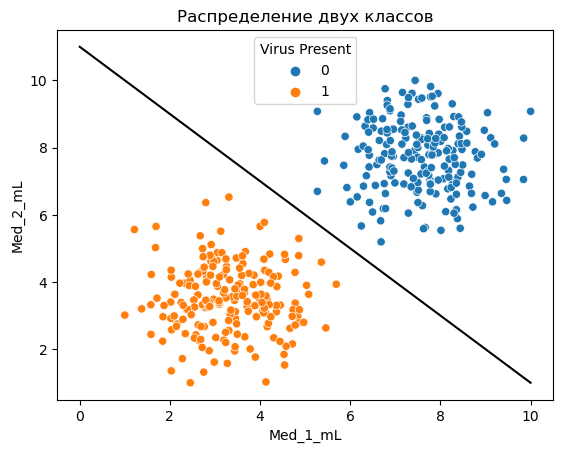

In [6]:
sns.scatterplot(x = 'Med_1_mL', 
                y = 'Med_2_mL', 
                hue = 'Virus Present', 
                data = df).set_title('Распределение двух классов')

#линия
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m * x + b
plt.plot(x, y, 'black');

Видим, что два класса идеально разделимы друг от друга.

Поулченная нами линия показывает одну из вероятных для разделения. Применим метод опорных векторов, чтобы найти идеально разделяющую линию.

## <font color='green'> Создаем модель </font>

<font color='green'>Выделяем целевую переменную</font>

In [7]:
y = df['Virus Present']
X = df.drop('Virus Present', axis = 1)

<font color='green'>Разбиение на обучающий и тестовый набор данных, масштабирование</font>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

In [9]:
sc_X_train_1 = pd.DataFrame(sc_X_train, columns = ['Med_1_mL','Med_2_mL'])
sc_X_test_1 = pd.DataFrame(sc_X_test, columns = ['Med_1_mL','Med_2_mL'])

In [10]:
model = SVC(kernel = 'linear', C = 1000)

Константа С обратнопропориональна той, что указывается в формуле расчета ядре, поэтому очень большое значение С означает, что мы допускаем очень малое количество точек для неправильной классификации

<font color='green'> Обучение модели</font>

In [11]:
model.fit(sc_X_train_1, y_train)

SVC(C=1000, kernel='linear')

## <font color='green'>Визуализация поведения различных моделей</font>

<font color='red'>Простая модель классификации</font>

kernel = linear, то есть без преобразований

С = 1000, то есть допускаем очень малое количество точек для неправильной классификации


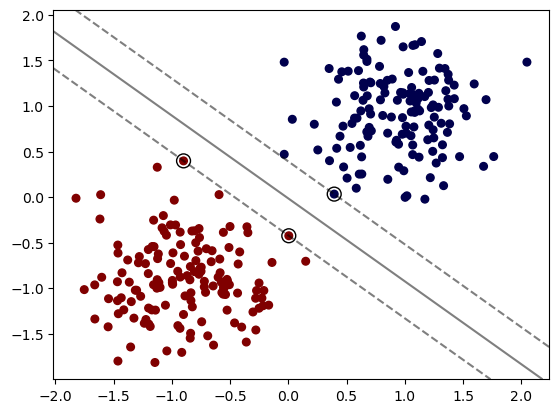

In [12]:
plot_svm_boundary(model, sc_X_train_1, y_train)

<font color='red'>Простая модель классификации</font>

kernel = linear, то есть без преобразований

С = 0,05, по мере того, как С приближается к нулю, мы допускаем все больше точек, которые могут быть неверно классифицированы.

Итог: более широкие зазоры

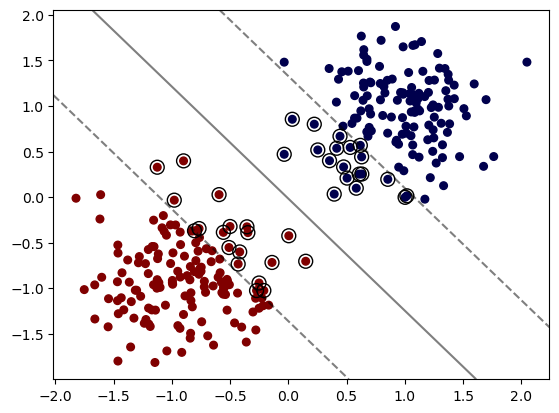

In [13]:
model = SVC(kernel = 'linear', C = 0.05)
model.fit(sc_X_train_1, y_train)
plot_svm_boundary(model, sc_X_train_1, y_train)

<font color='red'>Радиальная базисная функция</font>

kernel = rbf (обычно идет как значение по умолчанию)

С = 1, некоторое среднее значение. Если делать С меньше, то в пространстве между зазором и разделяющей линией будет больше точек

Итог: такое ядро берет наши данные и проецирует их в пространство с бОльшей размерностью, поэтому когда мы проецируем нашу плоскость обратно в наше исходное пространство, то это уже не будет выглядеть как прямая, а как кривая линия. Зазоры теперь строятся вокруг наших кластеров с точками.

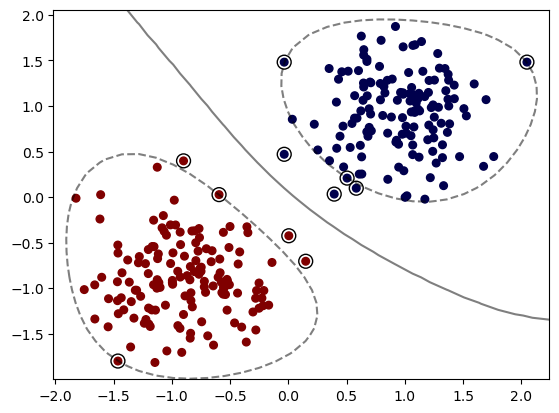

In [14]:
model = SVC(kernel = 'rbf', C = 1)
model.fit(sc_X_train_1, y_train)
plot_svm_boundary(model, sc_X_train_1, y_train)

<font color='red'>Радиальная базисная функция</font>

kernel = rbf (обычно идет как значение по умолчанию)

С = 1, некоторое среднее значение

gamma = auto, 1/количество признаков, в нашем случае 1/2.

С увеличением значения gamma, тем больше наши зазоры начинают проходить через опорные вектора. То есть мы будем извлекать из данных слишком мног информации, что приводит к переобучению. Scale - гораздо лучше.

Итог: за счет добавления параметра gamma в режим auto, наша модель становится гораздо более чувствительной к шуму в данных. Т.о., чем больше значение gamma, тем ближе должны быть другие точки для того, чтобы влияние той или иной точки было заметно.

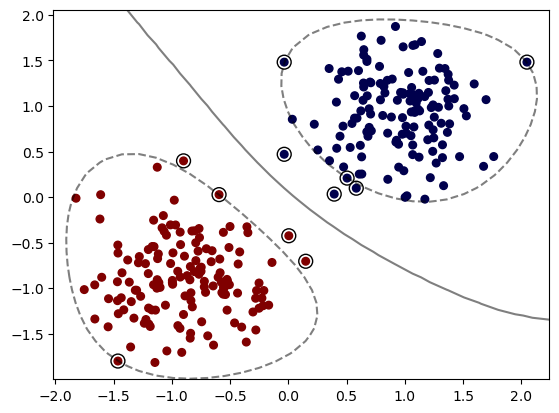

In [15]:
model = SVC(kernel = 'rbf', C = 1, gamma='auto')
model.fit(sc_X_train_1, y_train)
plot_svm_boundary(model, sc_X_train_1, y_train)

<font color='red'>Сигмоидная функция</font>

kernel = sigmoid

С = 1, некоторое среднее значение


Итог: почти все точки оказываются между зазором и разделяющей кривой.

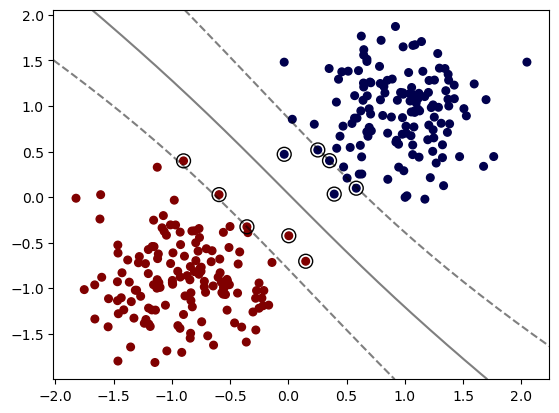

In [16]:
model = SVC(kernel = 'sigmoid')
model.fit(sc_X_train_1, y_train)
plot_svm_boundary(model, sc_X_train_1, y_train)

<font color='red'>Полиномиальное ядро</font>

kernel = poly

С = 1, некоторое среднее значение

degree (степень полинома) = 4

Итог: почти все точки оказываются между зазором и разделяющей кривой.

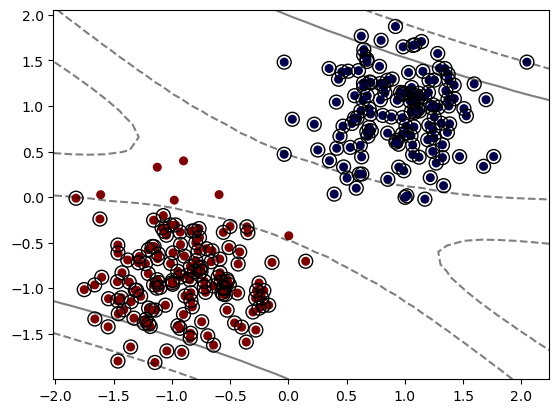

In [17]:
model = SVC(kernel = 'poly',degree = 4, C = 0.05)
model.fit(sc_X_train_1, y_train)
plot_svm_boundary(model, sc_X_train_1, y_train)

<font color='red'>Поиск по сетке</font>


In [18]:
#создаем модель
svm = SVC()

#создаем набор параметров
param_grid = {'C' : [0.01, 0.1, 1], 'kernel' : ['linear', 'rbf']}

#создаем сетку
grid = GridSearchCV(svm, param_grid)

#проводим обучением
grid.fit(sc_X_train_1, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

Посмотри на лучшие параметры

In [19]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

Это логично, потому что для наших данных вполне достаточно прямой для разделения
